In [24]:
import matplotlib.pyplot as plt
import numpy as np
import Geodesics as gd
import Model as md
import cmath as cmt
import glob
import os
import time
from scipy.optimize import curve_fit as cf

In [35]:
p = 5
q = 4
nlayers = 6
modl = md.FractonModel(p,q,nlayers)
save_dir = "../Data/P"+str(p)+"Q"+str(q)+"/"+str(nlayers)+"Layers"

corr1 = np.load(save_dir + "/Correlation.npy")
entr1 = np.load(save_dir + "/EntanglEntr.npy")


In [36]:
distances = np.linspace(1,int(len(modl.border)/2),int(len(modl.border)/2))
distances2 = np.linspace(1,int(len(modl.border)),int(len(modl.border)))

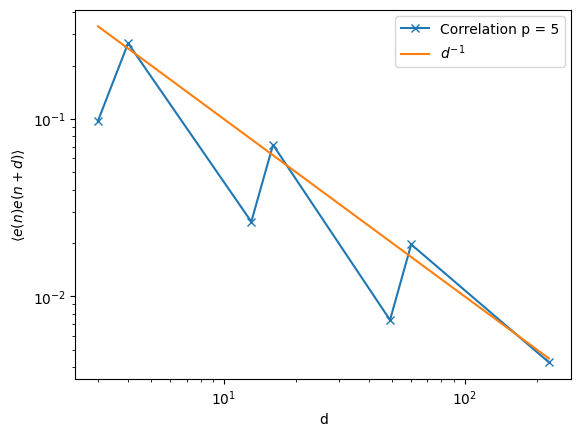

In [38]:
plt.plot(distances[corr1>0.0030],corr1[corr1>0.003],'x-',label = 'Correlation p = 5')
plt.plot(distances[corr1>0.0030],np.power(distances[corr1>0.0030],-1), label = r'$d^{-1}$')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\left< e(n)e(n+d)\right>$')
plt.xlabel('d')
plt.savefig(save_dir+"/CorrelationFig.png",format = 'png')

In [39]:
def func(x,c,L,eps):
    return c*np.log(L/(np.pi*eps)*np.sin(x*np.pi/L))

par, _ = cf(func,distances2,np.array(entr1), p0 = [2.23,int(len(modl.border)),0.88])

In [29]:
print(par)

[1.43630236e+00 8.82972595e+02 4.66934374e-01]


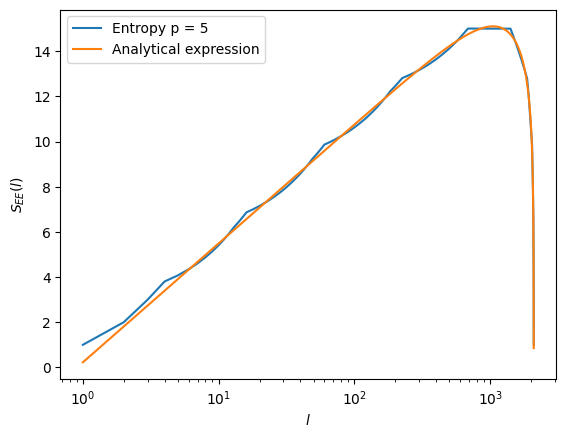

In [40]:
plt.plot(distances2,entr1,label = 'Entropy p = 5')
plt.plot(distances2,func(distances2,*par), label = 'Analytical expression')
plt.legend()
plt.xscale('log')
plt.ylabel(r'$S_{EE}(l)$')
plt.xlabel(r'$l$')
plt.savefig(save_dir+"/EntanglEntrFig.png",format = 'png')